In [1]:
# import packages
import pandas as pd
import numpy as np
import pickle
from sklearn import metrics
from tensorflow import keras
from sklearn.pipeline import Pipeline

In [2]:
# load test data
input_path = 'H:\RediMinds\VCQI'
#train = pd.read_csv(input_path+"\VCQI_clean_train.csv")
test = pd.read_csv(input_path+"\VCQI_clean_test.csv")

In [3]:
#x_train = train.drop(labels='INTRA_OP_COMPLICATIONS', axis = 'columns').copy()
#y_train = train['INTRA_OP_COMPLICATIONS'].copy()
x_test = test.drop(labels='INTRA_OP_COMPLICATIONS', axis = 'columns').copy()
y_test = test['INTRA_OP_COMPLICATIONS'].copy() 

In [4]:
# check % of pos labels in test set
#print('% pos labels train {:.2f}'.format(y_train.sum()/len(y_train)))
print('% pos labels test {:.2f}'.format(y_test.sum()/len(y_test)))

% pos labels test 0.05


In [5]:
# Generate prediction for the Random Forest Model
with open (input_path+'\cat_col', 'rb') as fp:
    cat_col = pickle.load(fp)

model_path = 'output/models/'
from joblib import load
encoder = load(model_path+'OHE.joblib')

In [6]:
# Create dummy variables
one_hot_encoded_array = encoder.transform(x_test[cat_col]).toarray()
column_name = encoder.get_feature_names(cat_col)
x_test_OHE =  pd.DataFrame(one_hot_encoded_array, columns= column_name)
x_test = x_test.merge(x_test_OHE, how = 'left', left_index = True, right_index =True) # create dummy variables
x_test = x_test.drop(labels = cat_col, axis = 'columns') # drop original variables

### Load Models

In [7]:
model_path = 'output/models/'

In [8]:
# import Decision Tree Classifier
from joblib import load
DTC = load(model_path+'DTC.joblib')


In [9]:
# import Random Forest Classifer
from joblib import load
RFR = load(model_path+'RFR.joblib')

In [10]:
# import Random Forest Classifer
from joblib import load
Logit = load(model_path+'Logit.joblib')

In [11]:
# load Neural Network Model
from joblib import load
# Load the pipeline first:
pipeline = load(model_path+'nn_pipeline.pkl')

# Then, load the Keras model:
pipeline_model = keras.models.load_model(model_path+'nn_model.h5')

nn_model = Pipeline(steps=[('preprocessor', pipeline),
                ('classifier',pipeline_model)
               ])

W0918 22:32:34.527166 15416 deprecation.py:323] From H:\Anaconda3\lib\site-packages\tensorflow\python\keras\metrics.py:1792: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Load Models trained using SMOTE

In [12]:

# import Decision Tree Classifier
from joblib import load
SMOTE_DTC = load(model_path+'SMOTE_DTC.joblib')


Using TensorFlow backend.


In [13]:
# import Random Forest Classifer
from joblib import load
SMOTE_RFR = load(model_path+'SMOTE_RFR.joblib')

In [14]:
# import Random Forest Classifer
from joblib import load
SMOTE_Logit = load(model_path+'SMOTE_Logit.joblib')

In [15]:
# load Neural Network Model
# load Neural Network Model
from joblib import load
from imblearn.pipeline import Pipeline as imbpipeline
# Load the pipeline first:
pipeline_preprocessor = load(model_path+'nn_preprocessor_pipeline.pkl')
pipeline_smote = load(model_path+'nn_SMOTE_pipeline.pkl')

# Then, load the Keras model:
pipeline_model = keras.models.load_model(model_path+'SMOTE_nn_model.h5')

SMOTE_nn_model = imbpipeline(steps=[('preprocessor', pipeline_preprocessor),
                           ('SMOTE',pipeline_smote),
                           ('classifier',pipeline_model)
               ])

### Generate Predictions for the Test set

In [16]:
# Generate prediction for the Decsiion Tree Model
results_DTC = pd.DataFrame(DTC.predict(x_test), columns=['pred_label'])
results_DTC['pred_prob'] =  pd.DataFrame(DTC.predict_proba(x_test))[1]
results_DTC['true_label'] = np.array(y_test)

In [17]:
# Generate prediction for the Random Forest Model
results_RFR = pd.DataFrame(RFR.predict(x_test), columns=['pred_label'])
results_RFR['pred_prob'] =  pd.DataFrame(RFR.predict_proba(x_test))[1]
results_RFR['true_label'] = np.array(y_test)

In [18]:

# Generate prediction for the Logitic Regressions Model
results_Logit = pd.DataFrame(Logit.predict(x_test), columns=['pred_label'])
results_Logit['pred_prob'] =  pd.DataFrame(Logit.predict_proba(x_test))[1]
results_Logit['true_label'] = np.array(y_test)

In [19]:
# Generate prediction for Neural Network Model

# Generate prediction for the Neural Network Model
results_NN = pd.DataFrame(nn_model.predict(x_test), columns=['pred_prob'])
results_NN['pred_label'] =  results_NN['pred_prob'].apply(lambda x: 1 if x>=0.5 else 0)
results_NN['true_label'] = np.array(y_test)

### Generate Predictions for Testset - SMOTE Models

In [20]:
# Generate prediction for the Decsiion Tree Model
results_SMOTE_DTC = pd.DataFrame(SMOTE_DTC.predict(x_test), columns=['pred_label'])
results_SMOTE_DTC['pred_prob'] =  pd.DataFrame(SMOTE_DTC.predict_proba(x_test))[1]
results_SMOTE_DTC['true_label'] = np.array(y_test)

In [21]:
# Generate prediction for the Random Forest Model
results_SMOTE_RFR = pd.DataFrame(SMOTE_RFR.predict(x_test), columns=['pred_label'])
results_SMOTE_RFR['pred_prob'] =  pd.DataFrame(SMOTE_RFR.predict_proba(x_test))[1]
results_SMOTE_RFR['true_label'] = np.array(y_test)

In [22]:
# Generate prediction for the Logistic Regressions Model
results_SMOTE_Logit = pd.DataFrame(SMOTE_Logit.predict(x_test), columns=['pred_label'])
results_SMOTE_Logit['pred_prob'] =  pd.DataFrame(SMOTE_Logit.predict_proba(x_test))[1]
results_SMOTE_Logit['true_label'] = np.array(y_test)

In [23]:

# Generate prediction for the Neural Network Model
results_SMOTE_NN = pd.DataFrame(SMOTE_nn_model.predict(x_test), columns=['pred_prob'])
results_SMOTE_NN['pred_label'] =  results_SMOTE_NN['pred_prob'].apply(lambda x: 1 if x>=0.5 else 0)
results_SMOTE_NN['true_label'] = np.array(y_test)

### Performance of the models for the testset

In [24]:
# Define function to calculate Precision-Recall Curve
def calc_aucpr_data(result):
    y_ACTUAL = result['true_label']
    scores_prob = result['pred_prob']
    yhat = result['pred_label']
    precision, recall, thresholds = metrics.precision_recall_curve(y_ACTUAL, scores_prob, pos_label=1)
    prc_auc = metrics.auc(recall,precision)
    return prc_auc


print("AUC-ROC DTC: {:.3f}".format(metrics.roc_auc_score(results_DTC['true_label'], results_DTC['pred_prob'])))
print("AUC-ROC LOGIT: {:.3f}".format(metrics.roc_auc_score(results_Logit['true_label'], results_Logit['pred_prob'])))
print("AUC-ROC RFR: {:.3f}".format(metrics.roc_auc_score(results_RFR['true_label'], results_RFR['pred_prob'])))
print("AUC-ROC NN: {:.3f}".format(metrics.roc_auc_score(results_NN['true_label'], results_NN['pred_prob'])))


print("PR-AUC DTC: {:.3f}".format(calc_aucpr_data(results_DTC)))
print("PR-AUC LOGIT: {:.3f}".format(calc_aucpr_data(results_Logit)))
print("PR-AUC RFR: {:.3f}".format(calc_aucpr_data(results_RFR)))
print("PR-AUC NN: {:.3f}".format(calc_aucpr_data(results_NN)))

AUC-ROC DTC: 0.789
AUC-ROC LOGIT: 0.860
AUC-ROC RFR: 0.872
AUC-ROC NN: 0.841
PR-AUC DTC: 0.222
PR-AUC LOGIT: 0.364
PR-AUC RFR: 0.466
PR-AUC NN: 0.445


H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:124: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


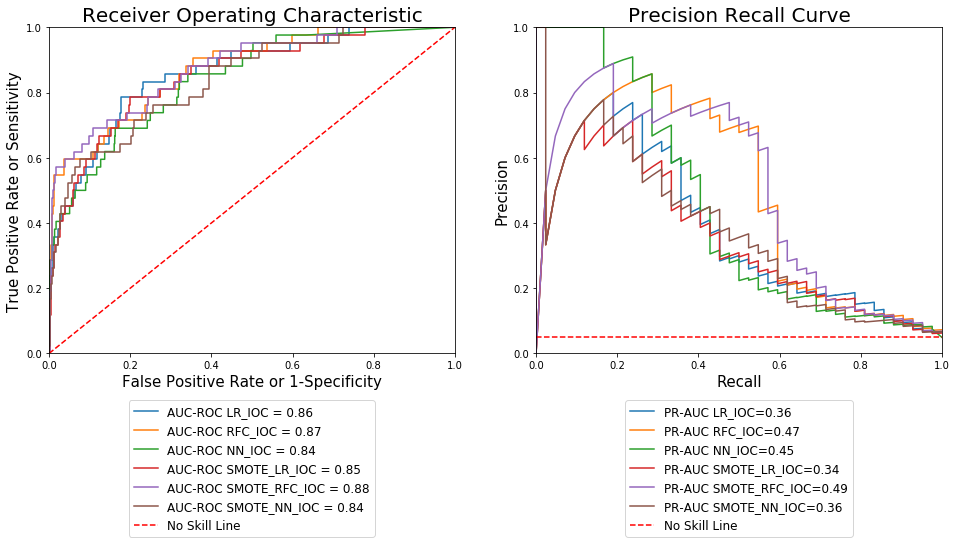

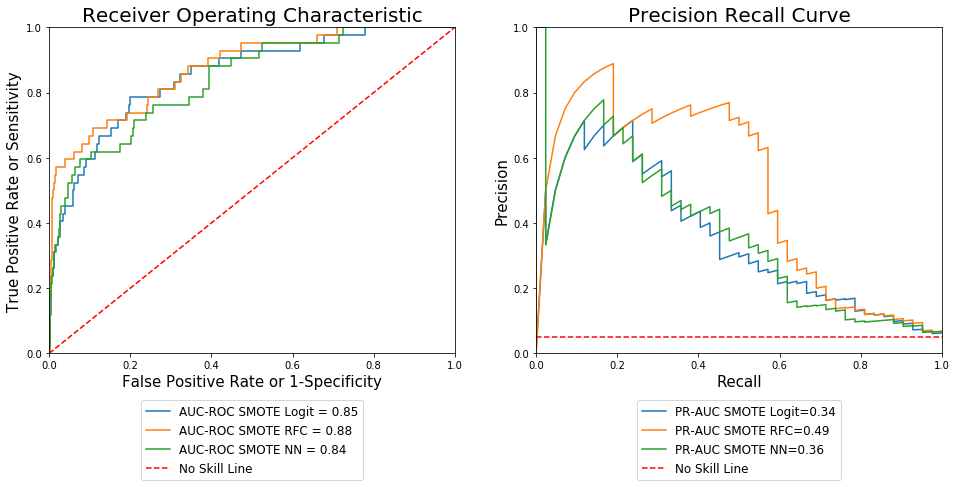

In [49]:
%matplotlib inline

# Plotting AUROC Curve - Calculatae Metrics
from sklearn import metrics
def calc_aucroc_data(result):
    y_ACTUAL= result['true_label']
    scores_prob = result['pred_prob']
    fpr, tpr, thresholds = metrics.roc_curve(y_ACTUAL, scores_prob, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    return fpr, tpr, thresholds, roc_auc

def calc_aucpr_data(result):
    y_ACTUAL = result['true_label']
    scores_prob = result['pred_prob']
    yhat = result['pred_label']
    precision, recall, thresholds = metrics.precision_recall_curve(y_ACTUAL, scores_prob, pos_label=1)
    prc_auc = metrics.auc(recall,precision)
    f1 = metrics.f1_score(y_ACTUAL, yhat)
    ap = metrics.average_precision_score(y_ACTUAL, yhat)
    mortality_ratio = round(sum(result['true_label'])/(len(result['true_label'])),2)
    return recall, precision, f1, prc_auc, mortality_ratio

### Calculate metrics for models trained on original data
#fpr_DTC, tpr_DTC, thresholds_DTC, roc_auc_DTC = calc_aucroc_data(results_DTC)
fpr_Logit, tpr_Logit, thresholds_Logit, roc_auc_Logit = calc_aucroc_data(results_Logit)
fpr_RFR, tpr_RFR, thresholds_RFR, roc_auc_RFR = calc_aucroc_data(results_RFR)
fpr_NN, tpr_NN, thresholds_NN, roc_auc_NN = calc_aucroc_data(results_NN)

#recall_DTC, precision_DTC, f1_DTC, prc_auc_DTC, mortality_ratio = calc_aucpr_data(results_DTC)
recall_Logit, precision_Logit, f1_Logit, prc_auc_Logit, mortality_ratio = calc_aucpr_data(results_Logit)
recall_RFR, precision_RFR, f1_RFR, prc_auc_RFR, mortality_ratio = calc_aucpr_data(results_RFR)
recall_NN, precision_NN, f1_NN, prc_auc_NN, mortality_ratio = calc_aucpr_data(results_NN)

### Calculate metrics for models trained on SMOTE imputed data
#fpr_DTC, tpr_DTC, thresholds_DTC, roc_auc_DTC = calc_aucroc_data(results_SMOTE_DTC)
fpr_s_Logit, tpr_s_Logit, thresholds_s_Logit, roc_auc_s_Logit = calc_aucroc_data(results_SMOTE_Logit)
fpr_s_RFR,   tpr_s_RFR,   thresholds_s_RFR,   roc_auc_s_RFR   = calc_aucroc_data(results_SMOTE_RFR)
fpr_s_NN,    tpr_s_NN,    thresholds_s_NN,    roc_auc_s_NN    = calc_aucroc_data(results_SMOTE_NN)

#recall_DTC, precision_DTC, f1_DTC, prc_auc_DTC, mortality_ratio = calc_aucpr_data(results_SMOTE_DTC)
recall_s_Logit, precision_s_Logit, f1_s_Logit, prc_auc_s_Logit, mortality_s_ratio = calc_aucpr_data(results_SMOTE_Logit)
recall_s_RFR,   precision_s_RFR,   f1_s_RFR,   prc_auc_s_RFR,   mortality_s_ratio = calc_aucpr_data(results_SMOTE_RFR)
recall_s_NN,    precision_s_NN,    f1_s_NN,    prc_auc_s_NN,    mortality_s_ratio = calc_aucpr_data(results_SMOTE_NN)

# Plotting performance of models developed using original data
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6))

# Plotting AUROC Curve - Plot Curve
ax1.set_title('Receiver Operating Characteristic',fontdict={"size":20})
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_ylabel('True Positive Rate or Sensitivity', fontdict={"size":15})
ax1.set_xlabel('False Positive Rate or 1-Specificity',fontdict={"size":15})

#ax1.plot(fpr_DTC, tpr_DTC, label = 'AUC-ROC DTC = %0.2f' % roc_auc_DTC)
ax1.plot(fpr_Logit, tpr_Logit, label = 'AUC-ROC LR_IOC = %0.2f' % roc_auc_Logit)
ax1.plot(fpr_RFR, tpr_RFR, label = 'AUC-ROC RFC_IOC = %0.2f' % roc_auc_RFR)
ax1.plot(fpr_NN, tpr_NN, label = 'AUC-ROC NN_IOC = %0.2f' % roc_auc_NN)
ax1.plot(fpr_s_Logit, tpr_s_Logit, label = 'AUC-ROC SMOTE_LR_IOC = %0.2f' % roc_auc_s_Logit)
ax1.plot(fpr_s_RFR, tpr_s_RFR, label = 'AUC-ROC SMOTE_RFC_IOC = %0.2f' % roc_auc_s_RFR)
ax1.plot(fpr_s_NN, tpr_s_NN, label = 'AUC-ROC SMOTE_NN_IOC = %0.2f' % roc_auc_s_NN)

ax1.plot([0, 1], [0, 1],linestyle='--',color='red', label = 'No Skill Line')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fontsize = 12)  

# Plotting Precision-Recall Curve - PLot Curve
ax2.set_title('Precision Recall Curve',fontdict={"size":20})
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_ylabel('Precision',fontdict={"size":15})
ax2.set_xlabel('Recall',fontdict={"size":15})

#ax2.plot(recall_DTC, precision_DTC, label = 'PR-AUC DTC=%.2f' % (prc_auc_DTC))
ax2.plot(recall_Logit, precision_Logit, label = 'PR-AUC LR_IOC=%.2f' % (prc_auc_Logit))
ax2.plot(recall_RFR, precision_RFR, label = 'PR-AUC RFC_IOC=%.2f' % (prc_auc_RFR))
ax2.plot(recall_NN, precision_NN, label = 'PR-AUC NN_IOC=%.2f' % (prc_auc_NN))
ax2.plot(recall_s_Logit, precision_s_Logit, label = 'PR-AUC SMOTE_LR_IOC=%.2f' % (prc_auc_s_Logit))
ax2.plot(recall_s_RFR, precision_s_RFR, label = 'PR-AUC SMOTE_RFC_IOC=%.2f' % (prc_auc_s_RFR))
ax2.plot(recall_s_NN, precision_s_NN, label = 'PR-AUC SMOTE_NN_IOC=%.2f' % (prc_auc_s_NN))
positive_class_ratio = mortality_ratio
ax2.plot([0, 1], [positive_class_ratio, positive_class_ratio],linestyle='--',color='red', label = 'No Skill Line')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),fontsize = 12)
fig.show()





# Plotting performance of models developed using SMOTE Data
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6))

# Plotting AUROC Curve - Plot Curve
ax1.set_title('Receiver Operating Characteristic',fontdict={"size":20})
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_ylabel('True Positive Rate or Sensitivity', fontdict={"size":15})
ax1.set_xlabel('False Positive Rate or 1-Specificity',fontdict={"size":15})

#ax1.plot(fpr_DTC, tpr_DTC, label = 'AUC-ROC SMOTE DTC = %0.2f' % roc_auc_DTC)
ax1.plot(fpr_s_Logit, tpr_s_Logit, label = 'AUC-ROC SMOTE Logit = %0.2f' % roc_auc_s_Logit)
ax1.plot(fpr_s_RFR, tpr_s_RFR, label = 'AUC-ROC SMOTE RFC = %0.2f' % roc_auc_s_RFR)
ax1.plot(fpr_s_NN, tpr_s_NN, label = 'AUC-ROC SMOTE NN = %0.2f' % roc_auc_s_NN)

ax1.plot([0, 1], [0, 1],linestyle='--',color='red', label = 'No Skill Line')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fontsize = 12)  

# Plotting Precision-Recall Curve - PLot Curve
ax2.set_title('Precision Recall Curve',fontdict={"size":20})
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_ylabel('Precision',fontdict={"size":15})
ax2.set_xlabel('Recall',fontdict={"size":15})

#ax2.plot(recall_DTC, precision_DTC, label = 'PR-AUC SMOTE DTC=%.2f' % (prc_auc_DTC))
ax2.plot(recall_s_Logit, precision_s_Logit, label = 'PR-AUC SMOTE Logit=%.2f' % (prc_auc_s_Logit))
ax2.plot(recall_s_RFR, precision_s_RFR, label = 'PR-AUC SMOTE RFC=%.2f' % (prc_auc_s_RFR))
ax2.plot(recall_s_NN, precision_s_NN, label = 'PR-AUC SMOTE NN=%.2f' % (prc_auc_s_NN))

positive_class_ratio = mortality_ratio
ax2.plot([0, 1], [positive_class_ratio, positive_class_ratio],linestyle='--',color='red', label = 'No Skill Line')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),fontsize = 12)
fig.show()


H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


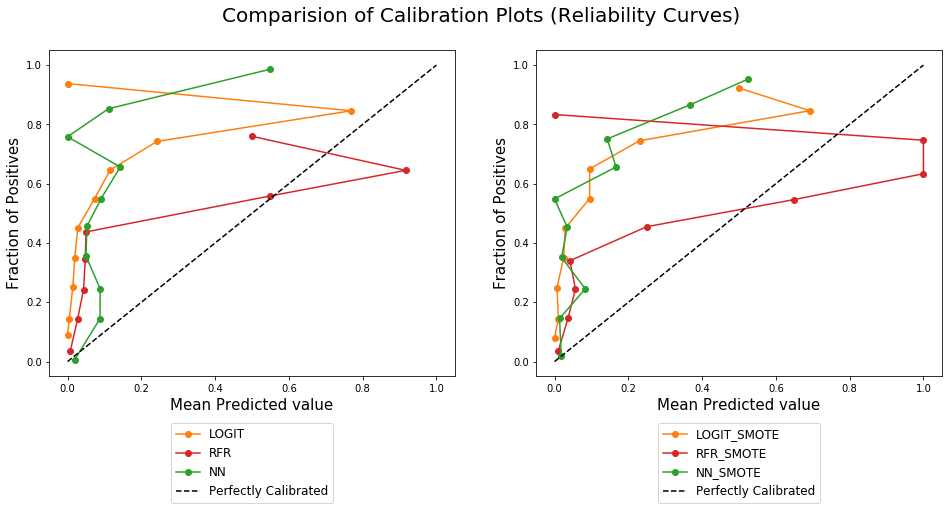

In [26]:
# Plotting Calibration curve
from sklearn.calibration import calibration_curve

def calib_curve(result):
    x, y = calibration_curve(result['true_label'],result['pred_prob'],n_bins = 10, strategy='uniform')
    return x, y

x_DTC, y_DTC = calib_curve(results_DTC)
x_Logit, y_Logit = calib_curve(results_Logit)
x_RFR, y_RFR = calib_curve(results_RFR)
x_NN, y_NN = calib_curve(results_NN)

x_SMOTE_DTC, y_SMOTE_DTC = calib_curve(results_SMOTE_DTC)
x_SMOTE_Logit, y_SMOTE_Logit = calib_curve(results_SMOTE_Logit)
x_SMOTE_RFR, y_SMOTE_RFR = calib_curve(results_SMOTE_RFR)
x_SMOTE_NN, y_SMOTE_NN = calib_curve(results_SMOTE_NN)


import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6))
fig.suptitle('Comparision of Calibration Plots (Reliability Curves)', fontsize=20)

#ax1.plot(x_DTC, y_DTC, marker = 'o', color = 'tab:blue', label = 'DTC')
ax1.plot(x_Logit, y_Logit, marker = 'o', color = 'tab:orange', label = 'LOGIT')
ax1.plot(x_RFR, y_RFR, marker = 'o', color = 'tab:red', label = 'RFR')
ax1.plot(x_NN, y_NN, marker = 'o', color = 'tab:green', label = 'NN')

ax1.plot([0, 1], [0, 1],linestyle='--',color='black', label = 'Perfectly Calibrated')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),fontsize = 12)
ax1.set_ylabel('Fraction of Positives',fontdict={"size":15})
ax1.set_xlabel('Mean Predicted value',fontdict={"size":15})

#ax2.plot(x_SMOTE_DTC, y_SMOTE_DTC, marker = 'o', color = 'tab:blue', label = 'DTC_SMOTE')
ax2.plot(x_SMOTE_Logit, y_SMOTE_Logit, marker = 'o', color = 'tab:orange', label = 'LOGIT_SMOTE')
ax2.plot(x_SMOTE_RFR, y_SMOTE_RFR, marker = 'o', color = 'tab:red', label = 'RFR_SMOTE')
ax2.plot(x_SMOTE_NN, y_SMOTE_NN, marker = 'o', color = 'tab:green', label = 'NN_SMOTE')

ax2.plot([0, 1], [0, 1],linestyle='--',color='black', label = 'Perfectly Calibrated')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),fontsize = 12)
ax2.set_ylabel('Fraction of Positives',fontdict={"size":15})
ax2.set_xlabel('Mean Predicted value',fontdict={"size":15})

fig.show()

### Create bootstrapped confidence intervals for each model

In [27]:
def bootstrapped_AUC(result):
    """
    This function can be used to create bootstrapped estimate of AUCROC and PRAUC
    The input for this funtion is a dataframe with following variables.
    
    Variables in dataframe
    ----------------------
    true_label : True label of testset
    
    pred_prob : The predicted probability
    
    pred_label : The predicted label
    """
    from sklearn.utils import resample
    from tqdm import tqdm

    n_iter = 10000
    roc_auc = list()
    prc_auc = list()


    for i in range(n_iter):
        result_sample = resample(result, n_samples = len(result),random_state=i)
        #Calculating AUROC for each sample
        y_ACTUAL= result_sample['true_label']
        scores_prob = result_sample['pred_prob']
        fpr, tpr, thresholds = metrics.roc_curve(y_ACTUAL, scores_prob, pos_label=1)
        roc_auc.append(metrics.auc(fpr, tpr))

        #calculate AUPRC for each sample
        y_ACTUAL = result_sample['true_label']
        scores_prob = result_sample['pred_prob']
        yhat = result_sample['pred_label']
        precision, recall, thresholds = metrics.precision_recall_curve(y_ACTUAL, scores_prob, pos_label=1)
        prc_auc.append(metrics.auc(recall,precision))
    
    return roc_auc, prc_auc

In [28]:
%%time
# Create bootstrapped estimates of AUCROC and PR
roc_auc_LR, pr_auc_LR  = bootstrapped_AUC(results_Logit)
roc_auc_RFR, pr_auc_RFR  = bootstrapped_AUC(results_RFR)
roc_auc_NN, pr_auc_NN  = bootstrapped_AUC(results_NN)
roc_auc_SMOTE_LR, pr_auc_SMOTE_LR  = bootstrapped_AUC(results_SMOTE_Logit)
roc_auc_SMOTE_RFR, pr_auc_SMOTE_RFR  = bootstrapped_AUC(results_SMOTE_RFR)
roc_auc_SMOTE_NN, pr_auc_SMOTE_NN  = bootstrapped_AUC(results_SMOTE_NN)

Wall time: 2min 15s


In [29]:
dict_AUCROC = {'roc_auc_LR': roc_auc_LR,
               'roc_auc_RFR': roc_auc_RFR,
               'roc_auc_NN': roc_auc_NN,
               'roc_auc_SMOTE_LR' : roc_auc_SMOTE_LR,
               'roc_auc_SMOTE_RFR': roc_auc_SMOTE_RFR,
               'roc_auc_SMOTE_NN' : roc_auc_SMOTE_NN
              }

dict_PRAUC = {'pr_auc_LR': pr_auc_LR,
               'pr_auc_RFR': pr_auc_RFR,
               'pr_auc_NN': pr_auc_NN,
               'pr_auc_SMOTE_LR' : pr_auc_SMOTE_LR,
               'pr_auc_SMOTE_RFR': pr_auc_SMOTE_RFR,
               'pr_auc_SMOTE_NN' : pr_auc_SMOTE_NN
              }
df_AUCROC = pd.DataFrame(dict_AUCROC)
df_PRAUC = pd.DataFrame(dict_PRAUC)

In [30]:
df_AUCROC.head()

,roc_auc_LR,roc_auc_RFR,roc_auc_NN,roc_auc_SMOTE_LR,roc_auc_SMOTE_RFR,roc_auc_SMOTE_NN
0,0.864257,0.860094,0.831788,0.859148,0.861513,0.823761
1,0.896944,0.898525,0.851353,0.887602,0.907437,0.867048
2,0.775457,0.793534,0.767260,0.766370,0.817644,0.770288
3,0.844456,0.871132,0.867944,0.836606,0.872635,0.827825
4,0.888300,0.887576,0.842721,0.878239,0.906745,0.861357


In [31]:
df_PRAUC.head()

,pr_auc_LR,pr_auc_RFR,pr_auc_NN,pr_auc_SMOTE_LR,pr_auc_SMOTE_RFR,pr_auc_SMOTE_NN
0,0.327584,0.465114,0.422462,0.330205,0.457499,0.324178
1,0.467517,0.584907,0.445396,0.385915,0.597134,0.386038
2,0.254084,0.346757,0.291768,0.245511,0.336065,0.256647
3,0.283192,0.480378,0.460848,0.265940,0.476248,0.289037
4,0.319635,0.373094,0.400310,0.258163,0.408256,0.244671


In [32]:
# Print Confidence intervals for AUCROC
x = df_AUCROC.describe(percentiles=[0.025,0.975])
for i in df_AUCROC.columns:
    print(i+' 95%CI: {:.3f} (95% CI {:.3f},{:.3f})'.format(x[i]['mean'], x[i]['2.5%'], x[i]['97.5%']))

roc_auc_LR 95%CI: 0.860 (95% CI 0.797,0.915)
roc_auc_RFR 95%CI: 0.872 (95% CI 0.814,0.924)
roc_auc_NN 95%CI: 0.842 (95% CI 0.777,0.898)
roc_auc_SMOTE_LR 95%CI: 0.854 (95% CI 0.789,0.911)
roc_auc_SMOTE_RFR 95%CI: 0.875 (95% CI 0.815,0.929)
roc_auc_SMOTE_NN 95%CI: 0.839 (95% CI 0.773,0.898)


In [33]:
# Print Confidence intervals for PRAUC
x = df_PRAUC.describe(percentiles=[0.025,0.975])
for i in df_PRAUC.columns:
    print(i+' 95%CI: {:.3f} (95% CI {:.3f},{:.3f})'.format(x[i]['mean'], x[i]['2.5%'], x[i]['97.5%']))

pr_auc_LR 95%CI: 0.376 (95% CI 0.224,0.540)
pr_auc_RFR 95%CI: 0.477 (95% CI 0.311,0.655)
pr_auc_NN 95%CI: 0.446 (95% CI 0.291,0.590)
pr_auc_SMOTE_LR 95%CI: 0.353 (95% CI 0.207,0.516)
pr_auc_SMOTE_RFR 95%CI: 0.496 (95% CI 0.326,0.670)
pr_auc_SMOTE_NN 95%CI: 0.368 (95% CI 0.216,0.529)


### Bootsrap Hypothesis Testing

In [34]:
from sklearn.utils import resample
def calculate_roc_auc(result):
    #Calculating AUROC for each sample
    y_ACTUAL= result['true_label']
    scores_prob = result['pred_prob']
    fpr, tpr, thresholds = metrics.roc_curve(y_ACTUAL, scores_prob, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)

    #calculate AUPRC for each sample
    y_ACTUAL = result['true_label']
    scores_prob = result['pred_prob']
    yhat = result['pred_label']
    precision, recall, thresholds = metrics.precision_recall_curve(y_ACTUAL, scores_prob, pos_label=1)
    prc_auc = metrics.auc(recall,precision)
    return roc_auc, prc_auc

In [35]:
def permutaion_diff(x, y):
    """
    This function creates a combined dataset under null hypothesis that there is no 
    difference between AUROC and PRAUC, of x and y.
    10000 samples are taken from combined dataset of length x, y respectively and the
    difference in AUCROC and PRROC is caulcated. 
    
    """
    # Combining the results of both algorithms under assumption that there is no difference between the results
    combined = pd.concat([x, y], sort = True)

    # Draw 10000 samples from combined dataset for each of length x and y where x, y are results of agorithms being tested
    # Calculate difference between the permuted sets


    dif_bootstrap_auc = []
    dif_bootstrap_prauc = []

    for i in range(10000):
        np.random.seed(i)
        perms_auroc_x, perms_prauc_x = calculate_roc_auc(resample(combined, n_samples = len(x)))
        perms_auroc_y, perms_prauc_y = calculate_roc_auc(resample(combined, n_samples = len(y)))
        dif_bootstrap_auc.append(perms_auroc_x-perms_auroc_y)
        dif_bootstrap_prauc.append(perms_prauc_x - perms_prauc_y)
    return dif_bootstrap_auc, dif_bootstrap_prauc

In [36]:
def permutaion_pvalue(x,y, bootstrap_diff,metric):
    """
    This function will take the x,y and calculate observed difference in metric.
    Check likelihood of getting the observed diff againt bootstrapped diff and provide p_value.
    If bootstrap_diff contains diff of AUC-ROC values then select metric as 'AUCROC'.
    If bootstrap_diff contains diff of PR-AUC values then select metric as 'PRAUC'.
    """
    
    if metric == 'AUCROC':
        metric = 0
    else: 
        metric = 1
    
    # Check the likelihood of getting observed differewnce in AUCROC and PRAUC
    obs_difs = (calculate_roc_auc(x)[metric] - calculate_roc_auc(y)[metric])
    #print('observed difference : {}'.format(obs_difs))
    p_value = sum(bootstrap_diff >= obs_difs)/10000
    #print('p-value: {}'.format(p_value))
    return obs_difs, p_value

In [37]:
def permutation_test(x,y):
    """
    This esxecutes permutaion test to check if diff in AUCROC and PRAUC of two classifiers is significant
    """
    dif_bootstrap_auc, dif_bootstrap_prauc = permutaion_diff(x,y)
    obs_difs_AUCROC, p_value_AUCROC = permutaion_pvalue(x,y,dif_bootstrap_auc, metric = 'AUCROC')
    obs_difs_PRAUC, p_value_PRAUC = permutaion_pvalue(x,y,dif_bootstrap_prauc, metric = 'PRAUC')
    return [obs_difs_AUCROC, obs_difs_PRAUC, p_value_AUCROC, p_value_PRAUC]

In [41]:
perm_stats = {'SMOTE_RFR_SMOTE_LR' : permutation_test(x = results_SMOTE_RFR, y = results_SMOTE_Logit),
              'SMOTE_RFR_SMOTE_NN' : permutation_test(x = results_SMOTE_RFR, y = results_SMOTE_NN),
              'SMOTE_RFR_RFR' : permutation_test(x = results_SMOTE_RFR, y = results_RFR),
              'SMOTE_RFR_LR' : permutation_test(x = results_SMOTE_RFR, y = results_Logit),
              'SMOTE_RFR_NN' : permutation_test(x = results_SMOTE_RFR, y = results_NN)
}

In [42]:
df_perm_stats = pd.DataFrame(perm_stats, index=['obs_difs_AUCROC',
                                               'obs_difs_PRAUC',
                                               'p_value_AUCROC',
                                               'p_value_PRAUC'])

In [43]:
df_perm_stats

,SMOTE_RFR_SMOTE_LR,SMOTE_RFR_SMOTE_NN,SMOTE_RFR_RFR,SMOTE_RFR_LR,SMOTE_RFR_NN
obs_difs_AUCROC,0.021223,0.036214,0.003498,0.014991,0.033965
obs_difs_PRAUC,0.144263,0.122357,0.019538,0.121145,0.040139
p_value_AUCROC,0.327200,0.209200,0.461000,0.378500,0.246900
p_value_PRAUC,0.076100,0.118700,0.429300,0.119500,0.347500
